## Linear Regression to determine the price differences between Booking and Expedia using a linear relationship.


Results for Decision Tree Regressor:
{'Model': 'Decision Tree Regressor', 'Train R2': 0.5907802070488737, 'Train RMSE': 16.157968581582157, 'Train MSE': 261.0799486833961, 'Train MAE': 10.4794822356924, 'Test R2': 0.5690216934771504, 'Test RMSE': 17.327950799489265, 'Test MSE': 300.2578789095207, 'Test MAE': 10.823066991196534}


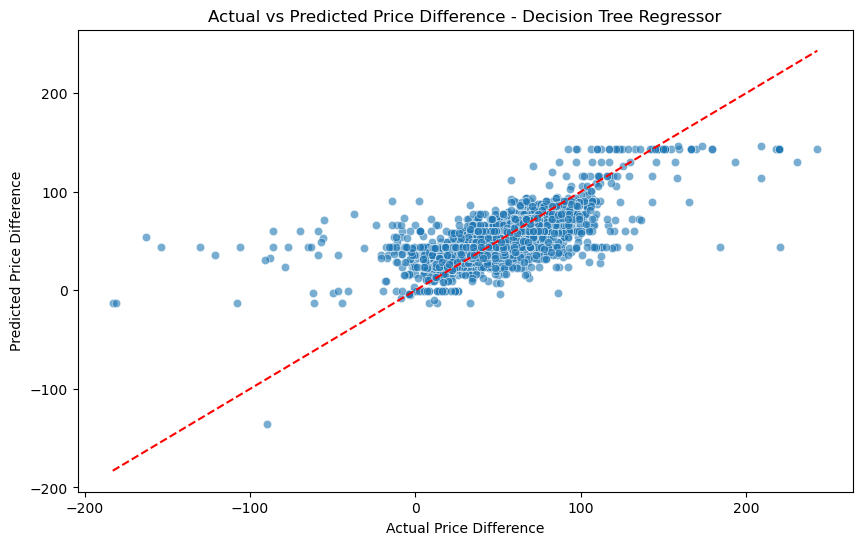

In [1]:
# decision_tree_regressor.py
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load the prepared data
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv').values.ravel()
y_test = pd.read_csv('y_test.csv').values.ravel()

# Initialize and fit the model
model = DecisionTreeRegressor(max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Metrics
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)

test_r2 = r2_score(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

results = {
    'Model': 'Decision Tree Regressor',
    'Train R2': train_r2,
    'Train RMSE': train_rmse,
    'Train MSE': train_mse,
    'Train MAE': train_mae,
    'Test R2': test_r2,
    'Test RMSE': test_rmse,
    'Test MSE': test_mse,
    'Test MAE': test_mae
}

# Display results
print("Results for Decision Tree Regressor:")
print(results)

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6)
plt.xlabel('Actual Price Difference')
plt.ylabel('Predicted Price Difference')
plt.title('Actual vs Predicted Price Difference - Decision Tree Regressor')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()


## Using a grid to make the results more accurate

Depth 2 - Cross-Validation R2 Scores: [0.70300094 0.69293152 0.70990961 0.71341413 0.70935264]
Depth 2 - Mean CV R2 Score: 0.7057217656142619, Std CV R2 Score: 0.007223394169437728
Depth 3 - Cross-Validation R2 Scores: [0.80814165 0.79730936 0.80251586 0.78862875 0.79872295]
Depth 3 - Mean CV R2 Score: 0.7990637134291253, Std CV R2 Score: 0.00642508400045298
Depth 4 - Cross-Validation R2 Scores: [0.83282646 0.83639333 0.83731764 0.82524005 0.8260564 ]
Depth 4 - Mean CV R2 Score: 0.8315667771078417, Std CV R2 Score: 0.005066488637979688
Depth 5 - Cross-Validation R2 Scores: [0.847313   0.85490375 0.8555988  0.84890939 0.84269752]
Depth 5 - Mean CV R2 Score: 0.8498844943837588, Std CV R2 Score: 0.004838641360186584
Depth 6 - Cross-Validation R2 Scores: [0.86036607 0.86969702 0.86650085 0.8640402  0.85991256]
Depth 6 - Mean CV R2 Score: 0.8641033410988325, Std CV R2 Score: 0.0037032731225834442
Depth 7 - Cross-Validation R2 Scores: [0.86964593 0.87583574 0.88269108 0.87650571 0.87383408]


C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

<function matplotlib.pyplot.xlabel(xlabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['left', 'center', 'right'] | None" = None, **kwargs) -> 'Text'>

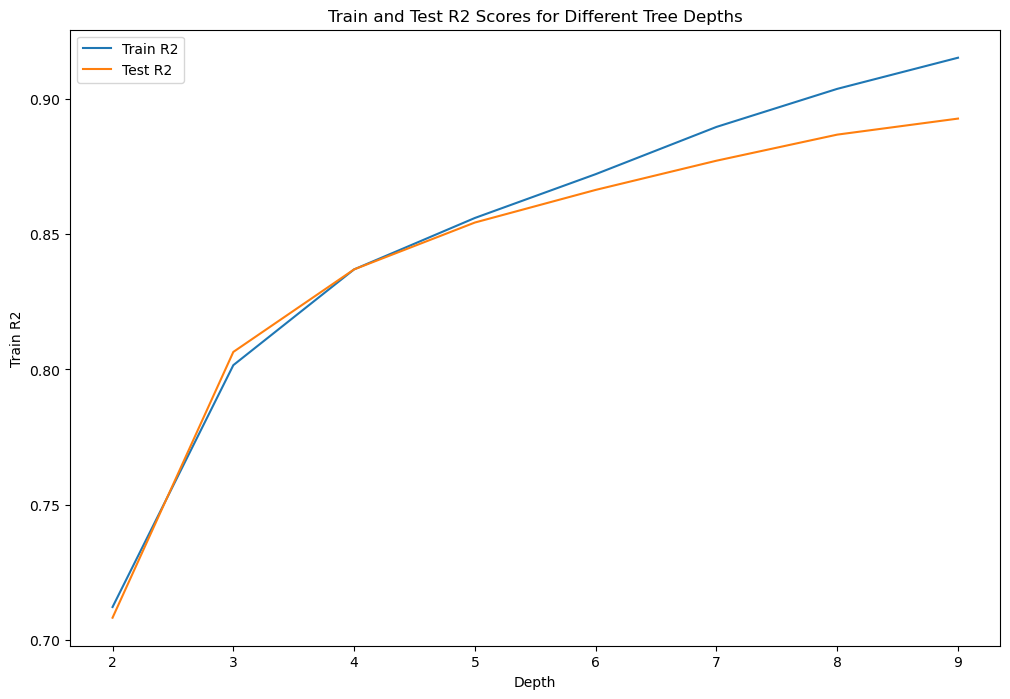

In [2]:
# decision_tree_regressor_with_cv.py
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load the prepared data
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv').values.ravel()
y_test = pd.read_csv('y_test.csv').values.ravel()

# Loop through depths from 2 to 9 and store the results
depth_results = []

for depth in range(2, 10):
    # Initialize and fit the Decision Tree Regressor model
    model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    print(f"Depth {depth} - Cross-Validation R2 Scores: {cv_scores}")
    print(f"Depth {depth} - Mean CV R2 Score: {cv_scores.mean()}, Std CV R2 Score: {cv_scores.std()}")
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Metrics
    train_r2 = r2_score(y_train, y_train_pred)
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    
    test_r2 = r2_score(y_test, y_test_pred)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    depth_results.append({
        'Depth': depth,
        'Train R2': train_r2,
        'Train RMSE': train_rmse,
        'Train MSE': train_mse,
        'Train MAE': train_mae,
        'Test R2': test_r2,
        'Test RMSE': test_rmse,
        'Test MSE': test_mse,
        'Test MAE': test_mae
    })

# Convert results to DataFrame for better visualization
depth_results_df = pd.DataFrame(depth_results)

# Display results
print("Decision Tree Regressor Results for Different Depths:")
print(depth_results_df)

# Plot results
plt.figure(figsize=(12, 8))
sns.lineplot(data=depth_results_df, x='Depth', y='Train R2', label='Train R2')
sns.lineplot(data=depth_results_df, x='Depth', y='Test R2', label='Test R2')
plt.title('Train and Test R2 Scores for Different Tree Depths')
plt.xlabel


Decision Tree Regressor Results for Different Depths:
   Depth  Train R2  Train RMSE   Train MSE  Train MAE   Test R2  Test RMSE  \
0      2  0.712238   13.549548  183.590256   9.575412  0.708287  14.255996   
1      3  0.801587   11.251065  126.586458   8.168983  0.806472  11.611573   
2      4  0.836966   10.198772  104.014960   7.451865  0.836964  10.657633   
3      5  0.855959    9.586307   91.897285   6.885359  0.854276  10.075938   
4      6  0.872142    9.031764   81.572757   6.386689  0.866325   9.650385   
5      7  0.889592    8.392842   70.439800   5.797956  0.877111   9.252843   
6      8  0.903653    7.840203   61.468783   5.337596  0.886746   8.882718   
7      9  0.915156    7.357305   54.129944   4.917254  0.892671   8.647252   

     Test MSE  Test MAE  
0  203.233433  9.824748  
1  134.828631  8.366726  
2  113.585143  7.657810  
3  101.524527  7.117367  
4   93.129926  6.643014  
5   85.615099  6.161817  
6   78.902684  5.792448  
7   74.774973  5.515532  


C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

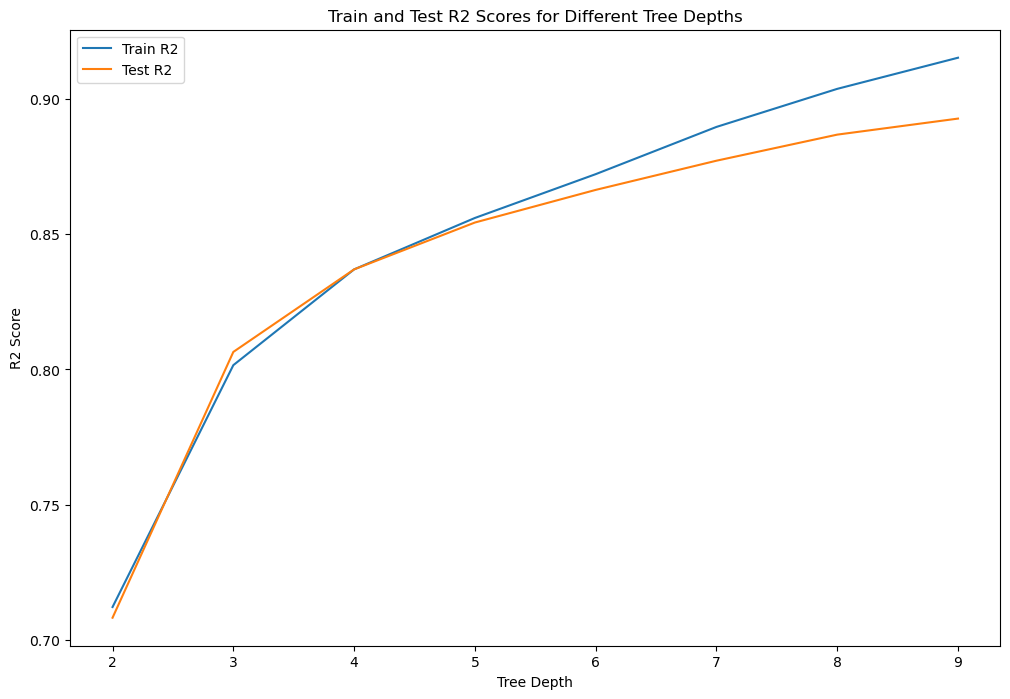

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

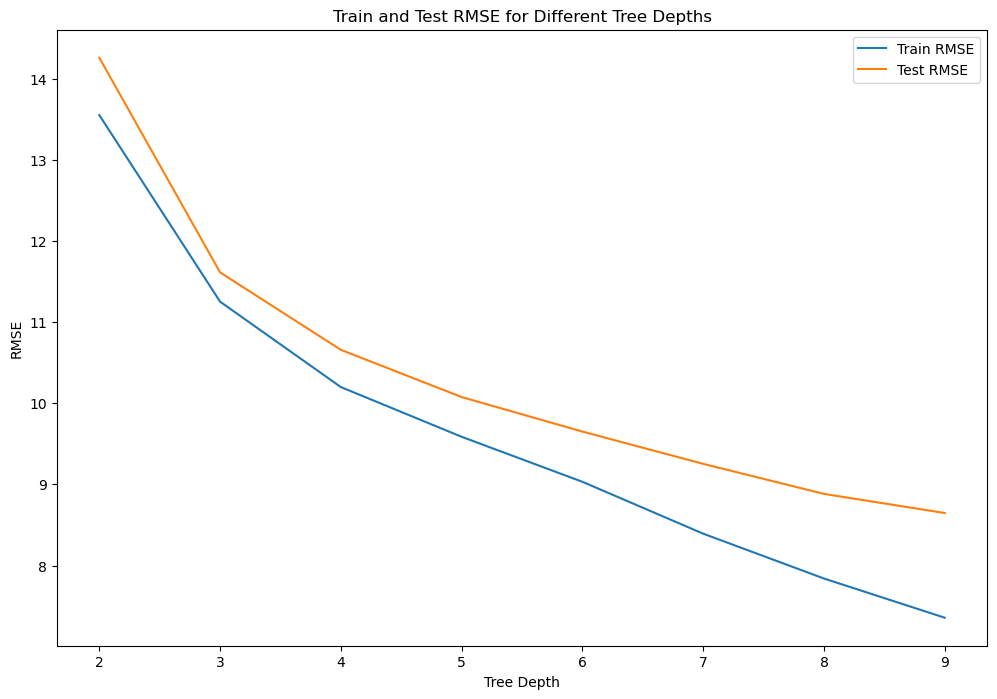

In [3]:
# decision_tree_regressor_with_depths.py
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load the prepared data
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv').values.ravel()
y_test = pd.read_csv('y_test.csv').values.ravel()

# Loop through depths from 2 to 9 and store the results
depth_results = []

for depth in range(2, 10):
    # Initialize and fit the Decision Tree Regressor model
    model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Metrics
    train_r2 = r2_score(y_train, y_train_pred)
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    
    test_r2 = r2_score(y_test, y_test_pred)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    depth_results.append({
        'Depth': depth,
        'Train R2': train_r2,
        'Train RMSE': train_rmse,
        'Train MSE': train_mse,
        'Train MAE': train_mae,
        'Test R2': test_r2,
        'Test RMSE': test_rmse,
        'Test MSE': test_mse,
        'Test MAE': test_mae
    })

# Convert results to DataFrame for better visualization
depth_results_df = pd.DataFrame(depth_results)

# Display results
print("Decision Tree Regressor Results for Different Depths:")
print(depth_results_df)

# Plot results
plt.figure(figsize=(12, 8))
sns.lineplot(data=depth_results_df, x='Depth', y='Train R2', label='Train R2')
sns.lineplot(data=depth_results_df, x='Depth', y='Test R2', label='Test R2')
plt.title('Train and Test R2 Scores for Different Tree Depths')
plt.xlabel('Tree Depth')
plt.ylabel('R2 Score')
plt.legend()
plt.show()

plt.figure(figsize=(12, 8))
sns.lineplot(data=depth_results_df, x='Depth', y='Train RMSE', label='Train RMSE')
sns.lineplot(data=depth_results_df, x='Depth', y='Test RMSE', label='Test RMSE')
plt.title('Train and Test RMSE for Different Tree Depths')
plt.xlabel('Tree Depth')
plt.ylabel('RMSE')
plt.legend()
plt.show()


## The Decision Tree model demonstrated improving R2 scores with increasing depth, with a Train R2 of 0.915 and Test R2 of 0.893 at depth 9. The consistent performance across depths suggests minimal overfitting, but the model's accuracy stabilizes at higher depths.